In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm


In [545]:
data=pd.read_csv('/Users/sazid/Downloads/1.04.+Real-life+example.csv')

with pd.option_context('display.max_rows', None):
    display(data)

Brand      Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz    7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz   13300.00      sedan      358     5.00         Gas   
3              Audi   23000.00  crossover      240     4.20      Petrol   
4            Toyota   18300.00  crossover      120     2.00      Petrol   
5     Mercedes-Benz  199999.00  crossover        0     5.50      Petrol   
6               BMW    6100.00      sedan      438     2.00         Gas   
7              Audi   14200.00      vagon      200     2.70      Diesel   
8           Renault   10799.00      vagon      193     1.50      Diesel   
9        Volkswagen    1400.00      other      212     1.80         Gas   
10          Renault   11950.00      vagon      177     1.50      Diesel   
11          Renault    2500.00      sedan      260     1.79      Petrol   
12             Audi    9500.00      vagon      165     2.70         Gas   
13       Volkswagen   10500.00      sedan      100     1.80      Petrol   
14           Toyota   16000.00  crossover      250     4.70         Gas   
15          Renault    8600.00      hatch       84     1.50      Diesel   
16              BMW    2990.00      other      203     2.00      Petrol   
17    Mercedes-Benz        NaN        van      240     2.20      Diesel   
18           Toyota   26500.00  crossover       21     2.00      Petrol   
19             Audi    3500.00      vagon      250     2.50      Diesel   
20           Toyota   38233.00      other        0     2.40      Diesel   
21       Volkswagen    7500.00      hatch      132     1.40      Diesel   
22             Audi    6800.00      sedan      225     2.40         Gas   
23       Mitsubishi   10500.00  crossover      130     2.40         Gas   
24             Audi   24900.00      sedan      163     4.20      Diesel   
25       Volkswagen   20800.00  crossover      151     3.00      Diesel   
26             Audi    6500.00      sedan      330     2.40      Petrol   
27    Mercedes-Benz   13566.00      other      171     2.20       Other   
28       Mitsubishi    8500.00      hatch       65     1.30      Petrol   
29    Mercedes-Benz        NaN  crossover        0     4.60      Petrol   
30             Audi    2900.00      sedan        1     2.30         Gas   
31              BMW   21500.00      other       72     3.00      Petrol   
32       Mitsubishi   17900.00  crossover       87     3.80         Gas   
33              BMW   28500.00  crossover      160     4.80         Gas   
34       Volkswagen    9800.00        van      160     1.90      Diesel   
35           Toyota   14500.00      sedan      147     2.40         Gas   
36              BMW    6000.00      sedan      300     2.80      Petrol   
37              BMW   67500.00  crossover        1     2.50      Diesel   
38             Audi   33900.00      other       14     1.80      Petrol   
39             Audi    2500.00      sedan      180      NaN      Petrol   
40    Mercedes-Benz    9800.00        van      230     2.15      Diesel   
41    Mercedes-Benz   63000.00  crossover       86     5.50      Petrol   
42              BMW    7700.00      sedan      326     2.80      Petrol   
43    Mercedes-Benz    9600.00        van       30     2.20      Diesel   
44           Toyota   12800.00      sedan      181     2.40      Petrol   
45              BMW   41000.00  crossover       80     3.00      Petrol   
46       Mitsubishi    2500.00      sedan      220     2.40      Petrol   
47              BMW    3700.00      sedan      231     2.50      Petrol   
48    Mercedes-Benz   29500.00      sedan      134     5.00      Petrol   
49              BMW    6500.00      sedan      335     2.80      Petrol   
50    Mercedes-Benz        NaN      sedan      145     3.20      Diesel   
51          Renault    8250.00        van       66     1.50      Diesel   
52    Mercedes-Benz   19500.00  crossov

In [546]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [549]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [548]:
data=data.dropna()

In [550]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4025         4025  4025.000000     4025  
unique           4            2          NaN      306  
top         Diesel          yes          NaN  E-Class  
freq          1861         3654          NaN      188  
mean           NaN          NaN  2006.379627      NaN  
std            NaN          NaN     6.695595      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

<Axes: xlabel='Mileage', ylabel='Count'>

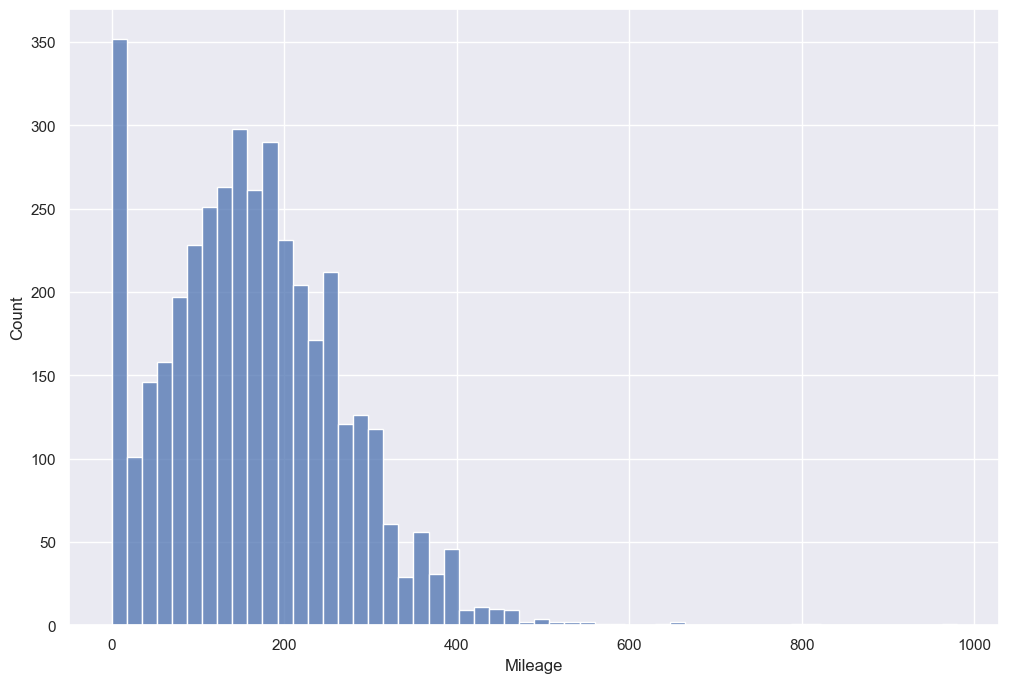

In [350]:
fig, ax = mat.subplots(figsize=(12, 8))
sns.histplot(data['Mileage'], ax=ax)

In [329]:
data1 = pd.get_dummies(data['Model'], drop_first=True)
data1 = data1.astype(int)
x= pd.DataFrame(data1)
y= pd.DataFrame(data['Price'])

reg = LinearRegression()
reg.fit(x,y)

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     65.91
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.25e-78
Time:                        12:53:28   Log-Likelihood:                -45503.
No. Observations:                3984   AIC:                         9.102e+04
Df Residuals:                    3977   BIC:                         9.106e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.895e+04   1079.613     17.550      0.000    1.68e+04    2.11e+04
BMW            4789.9422   1390.484      3.445      0.001    2063.815    7516.070
Mercedes-Benz  9525.4113   1331.822      7.152      0.000    6914.294    1.21e+04
Mitsubishi    -7535.1256   1661.791     -4.534      0.000   -1.08e+04   -4277.083
Renault       -1.085e+04   1510.155     -7.187      0.000   -1.38e+04   -7892.887
Toyota         3820.2765   1458.399      2.620      0.009     960.998    6679.555
Volkswagen    -5794.7323   1313.142     -4.413      0.000   -8369.227   -3220.237
==============================================================================
Omnibus:                     2857.946   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49865.334
Skew:                           3.280   Prob(JB):                         0.00
Kurtosis:                      19.043   Cond. No.                         9.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
data = data.drop(['Year'], axis=1)

In [551]:
data = pd.get_dummies(data, drop_first=True)

data = data.astype(int)
with pd.option_context('display.max_rows', None):
 display(data)


Price  Mileage  EngineV  Year  Brand_BMW  Brand_Mercedes-Benz  \
0       4200      277        2  1991          1                    0   
1       7900      427        2  1999          0                    1   
2      13300      358        5  2003          0                    1   
3      23000      240        4  2007          0                    0   
4      18300      120        2  2011          0                    0   
5     199999        0        5  2016          0                    1   
6       6100      438        2  1997          1                    0   
7      14200      200        2  2006          0                    0   
8      10799      193        1  2012          0                    0   
9       1400      212        1  1999          0                    0   
10     11950      177        1  2011          0                    0   
11      2500      260        1  1994          0                    0   
12      9500      165        2  2003          0                    0   
13     10500      100        1  2008          0                    0   
14     16000      250        4  2001          0                    0   
15      8600       84        1  2012          0                    0   
16      2990      203        2  2001          1                    0   
18     26500       21        2  2013          0                    0   
19      3500      250        2  1998          0                    0   
20     38233        0        2  2016          0                    0   
21      7500      132        1  2006          0                    0   
22      6800      225        2  1998          0                    0   
23     10500      130        2  2006          0                    0   
24     24900      163        4  2008          0                    0   
25     20800      151        3  2008          0                    0   
26      6500      330        2  1999          0                    0   
27     13566      171        2  2011          0                    1   
28      8500       65        1  2010          0                    0   
30      2900        1        2  1989          0                    0   
31     21500       72        3  2007          1                    0   
32     17900       87        3  2008          0                    0   
33     28500      160        4  2008          1                    0   
34      9800      160        1  2009          0                    0   
35     14500      147        2  2006          0                    0   
36      6000      300        2  1996          1                    0   
37     67500        1        2  2016          1                    0   
38     33900       14        1  2014          0                    0   
40      9800      230        2  2004          0                    1   
41     63000       86        5  2009          0                    1   
42      7700      326        2  1998          1                    0   
43      9600       30        2  2006          0                    1   
44     12800      181        2  2008          0                    0   
45     41000       80        3  2012          1                    0   
46      2500      220        2  1987          0                    0   
47      3700      231        2  1990          1                    0   
48     29500      134        5  2008          0                    1   
49      6500      335        2  1996          1                    0   
51      8250       66        1  2014          0                    0   
52     19500      172        3  2008          0                    1   
53     13500      317        5  2001          0                    1   
54      9200      266        2  2008          0                    1   
57      5000      265        2  2006          0                    0   
58     23900      162        4  2007          1                    0   
59     36900       81        3  2010          1                    0   
60      8900      253        1  1995          1

In [409]:
data = data[data['EngineV']<=10]

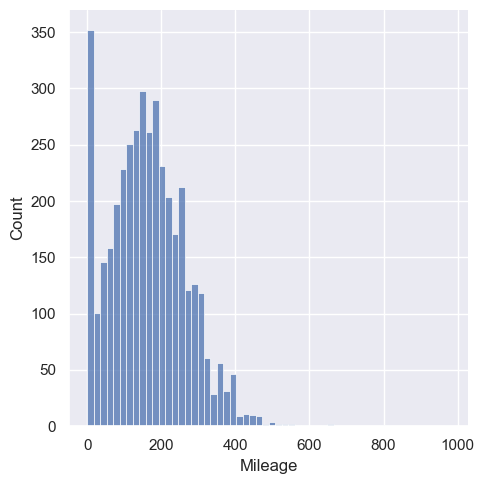

In [349]:
sns.displot(data['Mileage'])

In [552]:
data.describe()

Price      Mileage      EngineV         Year    Brand_BMW  \
count    4025.000000  4025.000000  4025.000000  4025.000000  4025.000000   
mean    19552.301863   163.572174     2.413665  2006.379627     0.159006   
std     25815.734905   103.394703     4.941161     6.695595     0.365727   
min       600.000000     0.000000     0.000000  1969.000000     0.000000   
25%      6999.000000    90.000000     1.000000  2003.000000     0.000000   
50%     11500.000000   158.000000     2.000000  2007.000000     0.000000   
75%     21900.000000   230.000000     3.000000  2012.000000     0.000000   
max    300000.000000   980.000000    99.000000  2016.000000     1.000000   

       Brand_Mercedes-Benz  Brand_Mitsubishi  Brand_Renault  Brand_Toyota  \
count          4025.000000       4025.000000    4025.000000   4025.000000   
mean              0.204472          0.076273       0.110559      0.126708   
std               0.403365          0.265468       0.313624      0.332687   
min               0.000000          0.000000       0.000000      0.000000   
25%               0.000000          0.000000       0.000000      0.000000   
50%               0.000000          0.000000       0.000000      0.000000   
75%               0.000000          0.000000       0.000000      0.000000   
max               1.000000          1.000000       1.000000      1.000000   

       Brand_Volkswagen  ...   Model_Vito     Model_X1     Model_X3  \
count       4025.000000  ...  4025.000000  4025.000000  4025.000000   
mean           0.218634  ...     0.038758     0.002733     0.002981   
std            0.413371  ...     0.193041     0.052212     0.054527   
min            0.000000  ...     0.000000     0.000000     0.000000   
25%            0.000000  ...     0.000000     0.000000     0.000000   
50%            0.000000  ...     0.000000     0.000000     0.000000   
75%            0.000000  ...     0.000000     0.000000     0.000000   
max            1.000000  ...     1.000000     1.000000     1.000000   

          Model_X5   Model_X5 M     Model_X6   Model_X6 M  Model_Yaris  \
count  4025.000000  4025.000000  4025.000000  4025.000000  4025.000000   
mean      0.027578     0.002236     0.009193     0.000994     0.003478   
std       0.163780     0.047240     0.095448     0.031513     0.058881   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Model_Z3     Model_Z4  
count  4025.000000  4025.000000  
mean      0.000248     0.001242  
std       0.015762     0.035228  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 324 columns]

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

NameError: name 'data' is not defined

In [554]:
x = data.drop(['Price'], axis=1)
y = np.log(pd.DataFrame(data['Price']))


In [555]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)

In [556]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size =.2, random_state=1)

In [557]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [558]:
x1 = sm.add_constant(x_train)
model = sm.OLS(y_train,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        14:47:36   Log-Likelihood:                 126.92
No. Observations:                3220   AIC:                             340.2
Df Residuals:                    2923   BIC:                             2145.
Df Model:                         296                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0704      0.007     -9.889      0.000      -0.084      -0.056
x2            -0.0083      0.005     -1.722      0.085      -0.018       0.001
x3             0.5833      0.008     69.233      0.000       0.567       0.600
x4           6.77e+11   3.94e+11      1.718      0.086   -9.57e+10    1.45e+12
x5          7.466e+11   4.35e+11      1.718      0.086   -1.06e+11     1.6e+12
x6         -1.323e+11    7.7e+10     -1.718      0.086   -2.83e+11    1.87e+10
x7          3.353e+11   1.95e+11      1.718      0.086   -4.74e+10    7.18e+11
x8          6.597e+11   3.84e+11      1.718      0.086   -9.33e+10    1.41e+12
x9         -1.463e+12   8.52e+11     -1.718      0.086   -3.13e+12    2.07e+11
x10           -0.0010      0.012     -0.087      0.931      -0.024       0.022
x11            0.0037      0.011      0.349      0.727      -0.017       0.024
x12           -0.0601      0.019     -3.237      0.001      -0.096      -0.024
x13           -0.0422      0.011     -3.737      0.000      -0.064      -0.020
x14           -0.0229      0.015     -1.556      0.120      -0.052       0.006
x15           -0.0289      0.006     -4.885      0.000      -0.041      -0.017
x16           -0.0099      0.005     -2.087      0.037      -0.019      -0.001
x17           -0.0267      0.007     -3.971      0.000      -0.040      -0.013
x18            0.2558      0.005     48.988      0.000       0.246       0.266
x19         1.201e+11   6.99e+10      1.718      0.086    -1.7e+10    2.57e+11
x20         1.232e+10   7.17e+09      1.718      0.086   -1.74e+09    2.64e+10
x21            0.0269      0.008      3.294      0.001       0.011       0.043
x22            0.0294      0.009      3.115      0.002       0.011       0.048
x23           -0.0069      0.005     -1.265      0.206      -0.018       0.004
x24         1.743e+10   1.01e+10      1.718      0.086   -2.46e+09    3.73e+10
x25            0.0549      0.014      3.857      0.000       0.027       0.083
x26            0.0465      0.012      3.736      0.000       0.022       0.071
x27         1.232e+10   7.17e+09      1.718      0.086   -1.74e+09    2.64e+10
x28            0.0180      0.010      1.893      0.059      -0.001       0.037
x29            0.0286      0.008      3.676      0.000       0.013       0.044
x30            0.0376      0.011      3.563      0.000       0.017       0.058
x31         2.134e+10   1.24e+10      1.718      0.086   -3.02e+09    4.57e+10
x32            0.0166      0.006      2.669      0.008       0.004       0.029
x33         4.487e+11   2.61e+11      1.718      0.086   -6.34e+10    9.61e+11
x34            0.0428      0.011      3.904      0.000       0.021       0.064
x35            0.0933      0.021      4.383      0.000       0.052       0.135
x36            0.1361      0.030      4.585      0.000       0.078       0.194
x3

In [568]:
x = pd.DataFrame()
predict = pd.DataFrame(np.exp(reg.predict(x_test)))
y_train = y_test.reset_index(drop=True)
test = pd.DataFrame(np.exp(y_train))

x['predict']= predict
x['test']= test
x['dif']= x['test']-x['predict']
x['%%']= abs((x['dif']/x['test']*100))
with pd.option_context('display.max_rows', None):
    display(x)

/var/folders/df/b8rbh0n90y3_2931kbkfkrn40000gn/T/ipykernel_94812/3213516692.py:2: RuntimeWarning: overflow encountered in exp
  predict = pd.DataFrame(np.exp(reg.predict(x_test)))


predict      test           dif           %%
0    9.327446e+03    9800.0  4.725537e+02     4.821976
1    3.089119e+04   38000.0  7.108810e+03    18.707394
2    2.144477e+04   14800.0 -6.644770e+03    44.897096
3    2.111230e+04   22500.0  1.387700e+03     6.167556
4    3.277130e+04   31990.0 -7.812980e+02     2.442319
5    4.027004e+04   47900.0  7.629960e+03    15.928936
6    1.921306e+03    2099.0  1.776939e+02     8.465645
7    9.758389e+03   12200.0  2.441611e+03    20.013208
8    1.313616e+04   13600.0  4.638431e+02     3.410611
9    6.190706e+03    6250.0  5.929382e+01     0.948701
10   4.666720e+03    5600.0  9.332804e+02    16.665721
11   6.520356e+03    7500.0  9.796435e+02    13.061914
12   3.937935e+03    4300.0  3.620646e+02     8.420106
13   4.581488e+03    2200.0 -2.381488e+03   108.249442
14   6.155290e+03    7300.0  1.144710e+03    15.680960
15            inf   25500.0          -inf          inf
16   3.120577e+04   29500.0 -1.705766e+03     5.782257
17   8.555168e+03    9100.0  5.448324e+02     5.987170
18   1.799669e+04   18900.0  9.033103e+02     4.779419
19   3.258780e+04   32900.0  3.122049e+02     0.948951
20   9.663556e+03    9000.0 -6.635557e+02     7.372841
21   8.160409e+03    6800.0 -1.360409e+03    20.006014
22   5.797202e+03    2200.0 -3.597202e+03   163.509168
23   4.186797e+03    5000.0  8.132035e+02    16.264070
24   7.592423e+03    8400.0  8.075774e+02     9.614016
25   8.777312e+03    8700.0 -7.731242e+01     0.888648
26   8.964644e+03   11000.0  2.035356e+03    18.503234
27   1.055391e+04    9555.0 -9.989102e+02    10.454320
28   1.240522e+04   15900.0  3.494778e+03    21.979735
29   2.798291e+04   33200.0  5.217087e+03    15.714116
30   3.077368e+03    2700.0 -3.773676e+02    13.976578
31   6.015639e+03    7150.0  1.134361e+03    15.865184
32   1.047178e+04    8200.0 -2.271779e+03    27.704623
33   6.093240e+03    5400.0 -6.932404e+02    12.837785
34   1.152067e+04   11350.0 -1.706712e+02     1.503711
35   9.389134e+03   11450.0  2.060866e+03    17.998829
36   1.096124e+05  111999.0  2.386597e+03     2.130909
37   1.460622e+04   12900.0 -1.706222e+03    13.226527
38   5.259117e+03    3999.0 -1.260117e+03    31.510814
39   8.079133e+03    7200.0 -8.791326e+02    12.210175
40   1.242947e+04   10500.0 -1.929475e+03    18.375950
41   2.324621e+03    2350.0  2.537909e+01     1.079961
42   2.894883e+04   39040.0  1.009117e+04    25.848295
43   2.989694e+04   31000.0  1.103058e+03     3.558252
44            inf   42000.0          -inf          inf
45   1.663203e+04   22000.0  5.367969e+03    24.399859
46   1.799010e+04   15000.0 -2.990100e+03    19.934002
47   4.993232e+03    3600.0 -1.393232e+03    38.700882
48   1.484711e+04   13200.0 -1.647107e+03    12.478082
49   1.843022e+04   13900.0 -4.530217e+03    32.591489
50   3.244094e+04   55000.0  2.255906e+04    41.016471
51   1.336095e+04    8420.0 -4.940950e+03    58.681116
52   4.938675e+03    5500.0  5.613253e+02    10.205915
53   3.781532e+03    3800.0  1.846791e+01     0.485998
54   7.744271e+04   51500.0 -2.594271e+04    50.374192
55   1.818218e+04   17500.0 -6.821754e+02     3.898145
56   5.677445e+03    7300.0  1.622555e+03    22.226780
57   5.903609e+03    6500.0  5.963913e+02     9.175250
58   3.086397e+03    2500.0 -5.863965e+02    23.455862
59   1.670936e+04   18300.0  1.590639e+03     8.692018
60   1.202062e+04   11450.0 -5.706185e+02     4.983568
61   1.365777e+04    9950.0 -3.707775e+03    37.264067
62   1.198838e+04    9999.0 -1.989380e+03    19.895788
63   6.642469e+03    7900.0  1.257531e+03    15.918114
64   8.331523e+03    7650.0 -6.815227e+02     8.908793
65   3.024936e+04   35800.0  5.550642e+03    15.504588
66   2.980503e+03    3000.0  1.949684e+01     0.649895
67   1.444310e+04   15500.0  1.056895e+03     6.818678
68   1.755406e+04   19900.0  2.345936e+03    11.788623
69   0.000000e+00   11777.0  1.177700e+04   100.000000
70   4.527559e+03    5100.0  5.724409e+02    11.224332
71   1.107662e+04    3700.0 -7.376617e+03   199.36

In [579]:
x[np.isinf(x).any(axis=1)]

predict     test  dif   %%
15       inf  25500.0 -inf  inf
44       inf  42000.0 -inf  inf
192      inf  35000.0 -inf  inf
202      inf  37700.0 -inf  inf
208      inf   7900.0 -inf  inf
293      inf  13321.0 -inf  inf
304      inf   1450.0 -inf  inf
364      inf   1150.0 -inf  inf
402      inf  44000.0 -inf  inf
504      inf  14900.0 -inf  inf

In [564]:
reg.score(x_test, y_test)

-5.155532049444797e+27

In [87]:
reg.coef_

array([-2.97705882e+02, -2.30000000e+03,  9.26333333e+03,  8.97500000e+03,
       -6.00000000e+02, -1.60000000e+03, -1.13750000e+03,  2.45000000e+01,
       -2.75000000e+03, -1.00000000e+02,  4.10000000e+03, -1.01250000e+03,
       -2.73846667e+03,  1.50000000e+03, -1.40000000e+03,  5.99857143e+02,
        2.52093103e+03,  6.06160345e+03,  9.50000000e+02, -1.90000000e+03,
        9.88737500e+03,  1.06714286e+04,  6.82222222e+03,  1.65175000e+04,
        4.81220000e+04,  3.34000000e+04,  3.79000000e+04, -2.95000000e+03,
        2.30000000e+03,  3.47666667e+04,  1.58369507e+04,  6.87211111e+03,
       -1.20100000e+03,  2.32145098e+03,  6.67800000e+03,  7.72744898e+03,
        2.03499286e+04,  2.63333333e+03,  1.46770000e+04,  6.42696667e+04,
        8.14550000e+04,  1.84000000e+04,  7.10132500e+04,  1.82000000e+04,
        1.79000000e+04,  1.73258148e+04,  4.95000000e+03,  1.24971250e+04,
        6.04150000e+03,  4.52957333e+04,  1.56500000e+04, -1.36145833e+03,
       -2.90000000e+03, -